# SPRINT 1 DEPARTAMENTO DE FINANZAS

In [20]:
import pymysql
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df_BANK_marketing = pd.read_parquet('df_BANK_marketing.parquet')
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11163 non-null  int64  
 1   age            11163 non-null  float64
 2   job            11163 non-null  object 
 3   marital        11163 non-null  object 
 4   education      11163 non-null  object 
 5   is_in_default  11163 non-null  int64  
 6   balance        11163 non-null  int64  
 7   housing        11163 non-null  int64  
 8   loan           11163 non-null  int64  
 9   contact        11163 non-null  object 
 10  day            11163 non-null  int64  
 11  month          11163 non-null  object 
 12  duration       11163 non-null  int64  
 13  campaign       11163 non-null  int64  
 14  pdays          11163 non-null  int64  
 15  previous       11163 non-null  int64  
 16  poutcome       11163 non-null  object 
 17  deposit        11163 non-null  int64  
dtypes: flo

## EDA (Exploratory Data Analisis)

Procedemos a revisar nuestro dataframe para observar posibles anomalias.

In [22]:
df_f = df_BANK_marketing[['id','age','job','marital','is_in_default','balance','housing','loan']]
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11163 non-null  int64  
 1   age            11163 non-null  float64
 2   job            11163 non-null  object 
 3   marital        11163 non-null  object 
 4   is_in_default  11163 non-null  int64  
 5   balance        11163 non-null  int64  
 6   housing        11163 non-null  int64  
 7   loan           11163 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 697.8+ KB


In [23]:
df_f.shape

(11163, 8)

In [24]:
df_f.head()

,id,age,job,marital,is_in_default,balance,housing,loan
0,1,59.0,admin.,married,0,2343,1,0
1,2,59.0,admin.,married,0,2343,1,0
2,3,56.0,admin.,married,0,45,0,0
3,4,41.0,technician,married,0,1270,1,0
4,5,55.0,services,married,0,2476,1,0


Vemos que el dataframe está correcto y preparado para empezar con el análisis.

In [25]:
df_f.describe().round()

,id,age,is_in_default,balance,housing,loan
count,11163.0,11163.0,11163.0,11163.0,11163.0,11163.0
mean,5582.0,41.0,0.0,1529.0,0.0,0.0
std,3223.0,12.0,0.0,3225.0,0.0,0.0
min,1.0,18.0,0.0,-6847.0,0.0,0.0
25%,2792.0,32.0,0.0,122.0,0.0,0.0
50%,5582.0,39.0,0.0,550.0,0.0,0.0
75%,8372.0,49.0,0.0,1708.0,1.0,0.0
max,11163.0,95.0,1.0,81204.0,1.0,1.0


Se puede observar que balance tiene mucha dispersión ya que su mínima es negativa (-6847) y su máxima es muy alta(81204), el dataset no tiene nulos y las variables que tenemos corresponden con los tipos de datos.


### Visualizaciones iniciales


In [39]:
df_f['is_in_default'] = df_f['is_in_default'].replace({0:'no',1:'yes'})
df_f.head()

C:\Users\Adam\AppData\Local\Temp\ipykernel_2512\4162702803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['is_in_default'] = df_f['is_in_default'].replace({0:'no',1:'yes'})


,id,age,job,marital,is_in_default,balance,housing,loan
0,1,59.0,admin.,married,no,2343,1,0
1,2,59.0,admin.,married,no,2343,1,0
2,3,56.0,admin.,married,no,45,0,0
3,4,41.0,technician,married,no,1270,1,0
4,5,55.0,services,married,no,2476,1,0


In [40]:
df_f['balance'].value_counts()

balance
 0        774
 1         39
 3         35
 2         34
 4         29
         ... 
 9447       1
 1924       1
 5806       1
 20138      1
-134        1
Name: count, Length: 3805, dtype: int64

In [41]:
df_f['is_in_default'].value_counts()

is_in_default
no     10995
yes      168
Name: count, dtype: int64

#### Tipos de cliente

##### Balance 0

In [59]:
df_balance_0 = df_f[(df_f['balance'] == 0)]
df_balance_0

,id,age,job,marital,is_in_default,balance,housing,loan
6,7,42.0,management,single,no,0,1,1
100,101,35.0,blue-collar,divorced,no,0,1,0
125,126,33.0,blue-collar,married,no,0,1,0
139,140,28.0,self-employed,single,no,0,1,0
150,151,30.0,entrepreneur,single,no,0,1,1
...,...,...,...,...,...,...,...,...
11137,11138,31.0,management,single,no,0,1,0
11145,11146,60.0,retired,married,no,0,1,0
11148,11149,44.0,unemployed,married,no,0,0,0
11161,11162,43.0,technician,married,no,0,0,1


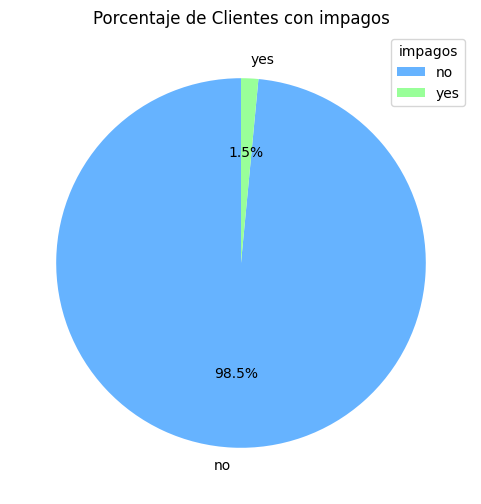

In [71]:
iid_counts = df_f['is_in_default'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(iid_counts, labels=iid_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Porcentaje de Clientes con impagos')
plt.legend(iid_counts.index, title="impagos", loc="best") 
plt.show()

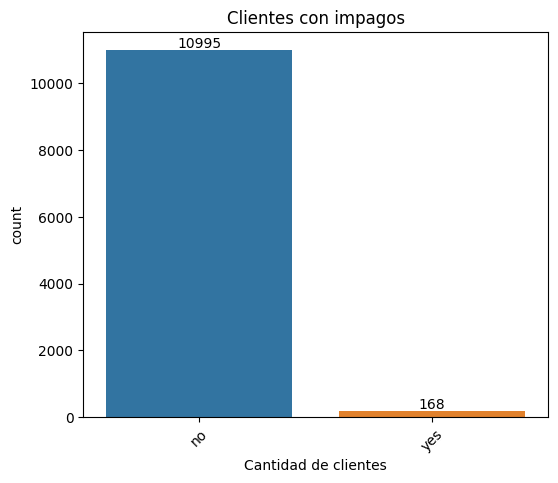

In [82]:
plt.figure(figsize=(6, 5))
num_iid = sns.countplot(data=df_f, x='is_in_default',order=df_f['is_in_default'].value_counts().index, hue='is_in_default')
for bar in num_iid.containers:
    num_iid.bar_label(bar)
plt.title('Clientes con impagos')
plt.xlabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()

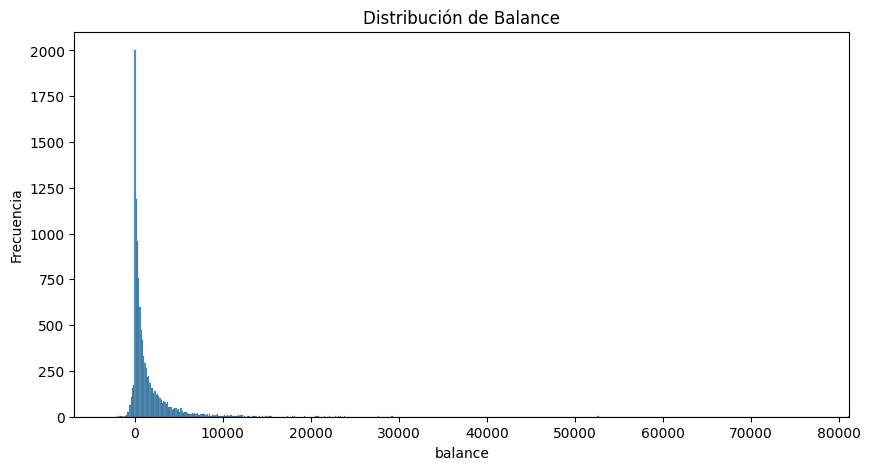

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['balance'])
plt.xlim(df_BANK_marketing['balance'].min(), df_BANK_marketing['balance'].max())
plt.title('Distribución de Balance')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()

Habiendo visto como se distribuyen los balances de los clientes y los impagos, vamos a analizar como se distribuyen los clientes con impagos

In [85]:
df_impagos = df_f[(df_f['is_in_default'] == 'yes')]
df_impagos.head()

,id,age,job,marital,is_in_default,balance,housing,loan
31,32,32.0,blue-collar,married,yes,-1,1,0
115,116,30.0,blue-collar,single,yes,239,1,0
211,212,42.0,technician,single,yes,-1129,1,0
214,215,44.0,management,divorced,yes,-411,1,0
217,218,40.0,self-employed,married,yes,-754,1,1


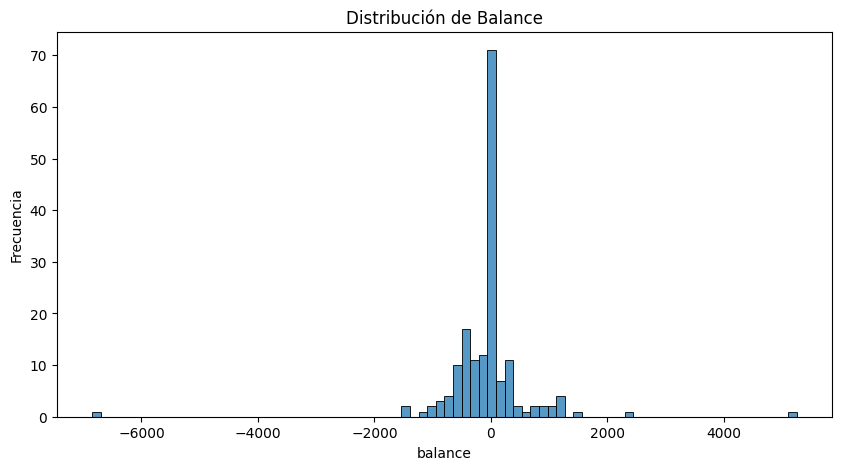

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(df_impagos['balance'])
plt.title('Distribución de Balance')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()

In [89]:
df_impagos['balance'].value_counts()

balance
 0       25
-1        3
 11       2
 4        2
 72       2
         ..
-1042     1
-405      1
-274      1
-930      1
 23       1
Name: count, Length: 137, dtype: int64

In [90]:
df_impagos.describe()

,id,age,balance,housing,loan
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,6377.553571,40.130952,-61.803571,0.517857,0.339286
std,3425.796324,9.825154,827.742361,0.501175,0.474882
min,32.000000,24.000000,-6847.000000,0.000000,0.000000
25%,4598.000000,32.000000,-344.000000,0.000000,0.000000
50%,7205.000000,39.500000,0.000000,1.000000,0.000000
75%,9116.250000,47.000000,65.500000,1.000000,1.000000
max,11148.000000,71.000000,5249.000000,1.000000,1.000000


## PREGUNTA DE NEGOCIO

### ¿En que medida los clientes con saldos más bajos están en más riesgo de incumplimiento del crédito y como tenemos que ajustar nuestras políticas de crédito para mitigar ese riesgo?

* Seguidamente analizaremos en profundidad las varibles que más nos convienen para resolver la duda que se nos presenta

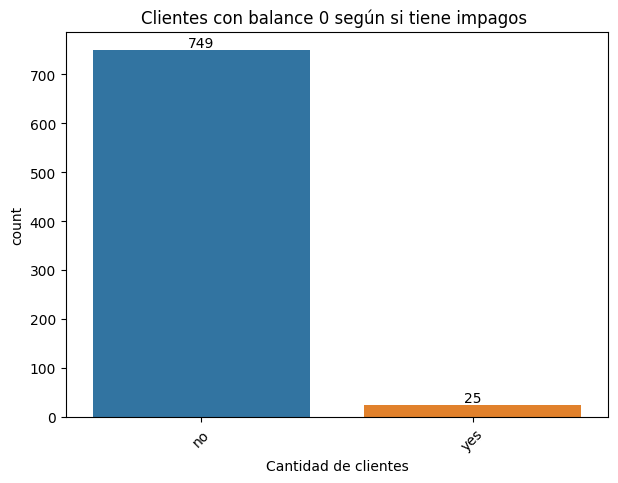

In [63]:
plt.figure(figsize=(7, 5))
num_b0 = sns.countplot(data=df_balance_0, x='is_in_default', order=df_f['is_in_default'].value_counts().index, hue= 'is_in_default')
for bar in num_b0.containers: # número en las barras
    num_b0.bar_label(bar)
plt.title('Clientes con balance 0 según si tiene impagos ')
plt.xlabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()

Observamos que tenemos 25 clientes que están con un balance 0 pero que tienen un incumplimiento de crédito

#### Variable blance

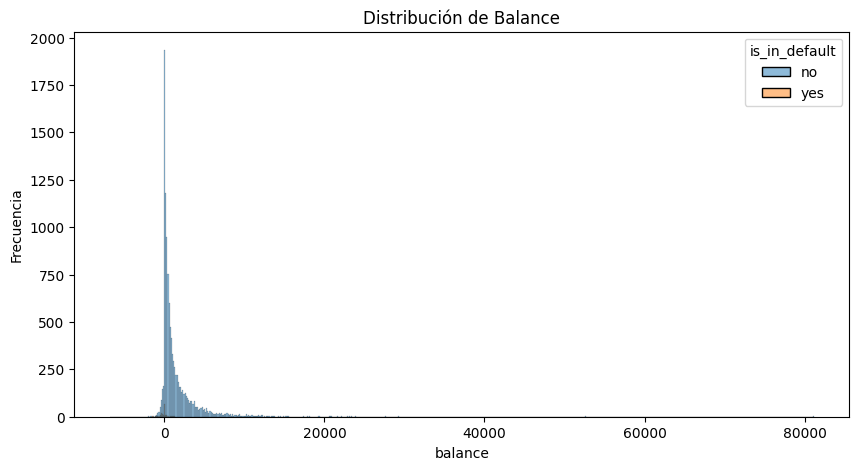

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_f,x = 'balance', hue ='is_in_default')
plt.title('Distribución de Balance')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()